In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Load the dataset
train_data = pd.read_csv("E:/Kaggle/Mohs/train.csv")

In [3]:
train_data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
train_data.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [5]:
train_data.rename(columns={'Hardness':"hardness", "R_vdw_element_Average":"r_vdw_element_Average", "R_cov_element_Average":"r_cov_element_Average"}, inplace=True)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   r_vdw_element_Average  10407 non-null  float64
 9   r_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


#### The columns are not having not any NULL Values

In [7]:
train_data.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,r_vdw_element_Average,r_cov_element_Average,zaratio_Average,density_Average,hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


#### Presence of outliers noticed in the describe part which affects mean and the standard deviation in all the affected columns

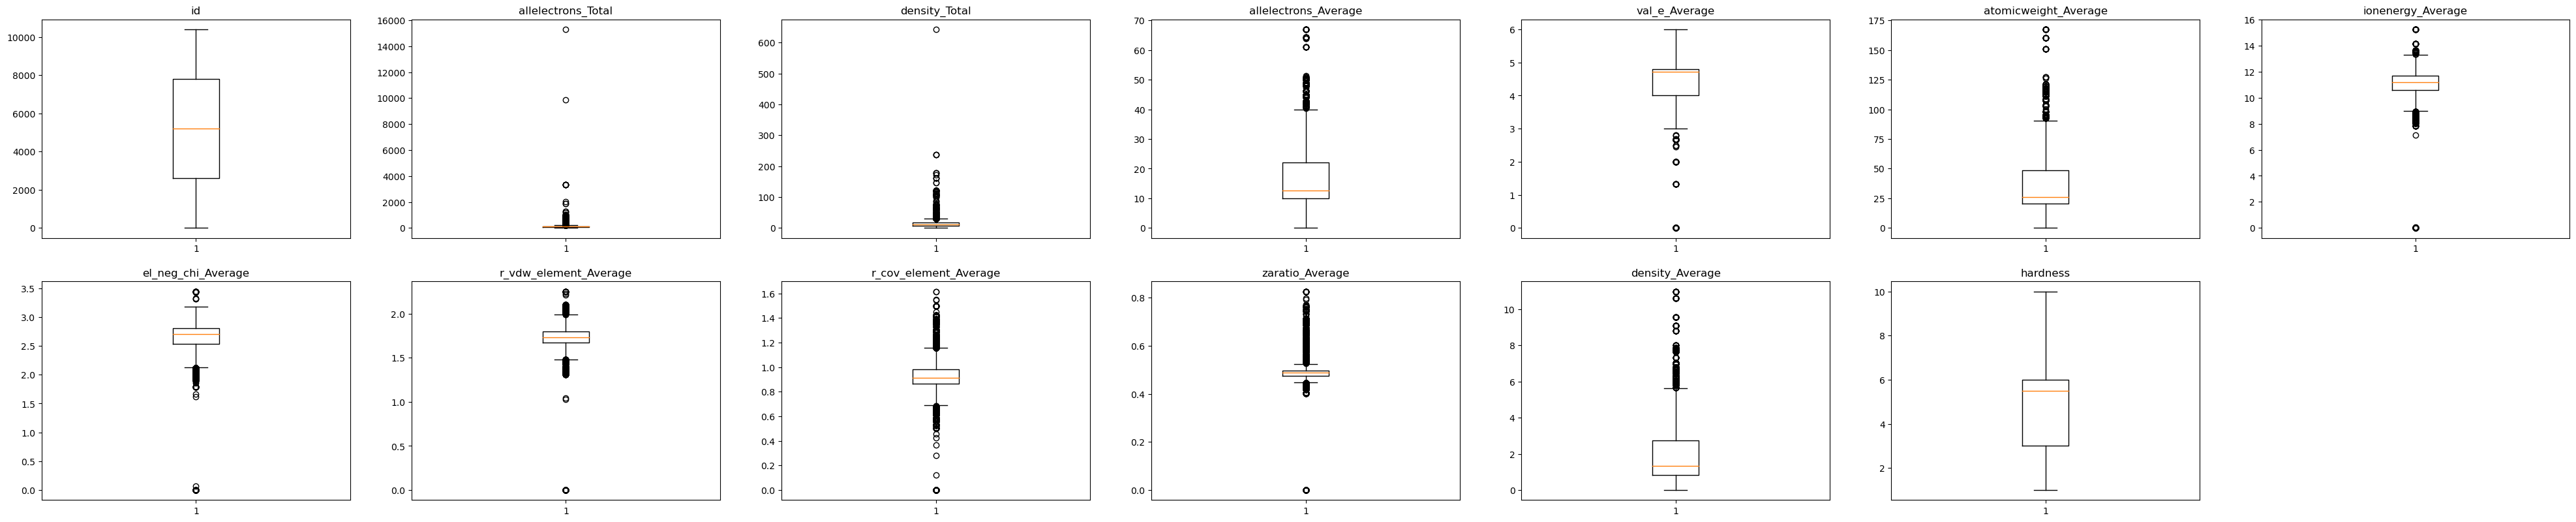

In [8]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in train_data.columns:
  plt.subplot(4,7,c)
  plt.title(f"{i}")
  plt.boxplot(train_data[i])
  c+=1
plt.show()

#### There are several variables with a lot of outliers in the data but we are going to keep them cause thats what differentiates them apart. We remove the wrong varaibles only if they are imperfect measurements.

In [28]:
train_data.hardness.sort_values().unique()

array([ 1.  ,  1.3 ,  1.5 ,  1.8 ,  2.  ,  2.1 ,  2.2 ,  2.3 ,  2.5 ,
        2.6 ,  2.8 ,  2.9 ,  3.  ,  3.2 ,  3.3 ,  3.5 ,  3.6 ,  3.8 ,
        4.  ,  4.1 ,  4.3 ,  4.5 ,  4.7 ,  4.8 ,  5.  ,  5.3 ,  5.4 ,
        5.5 ,  5.75,  5.8 ,  6.  ,  6.2 ,  6.3 ,  6.4 ,  6.5 ,  6.64,
        6.7 ,  6.8 ,  7.  ,  7.3 ,  7.5 ,  7.8 ,  8.  ,  8.1 ,  8.3 ,
        8.5 ,  9.  ,  9.5 ,  9.8 , 10.  ])

<Axes: >

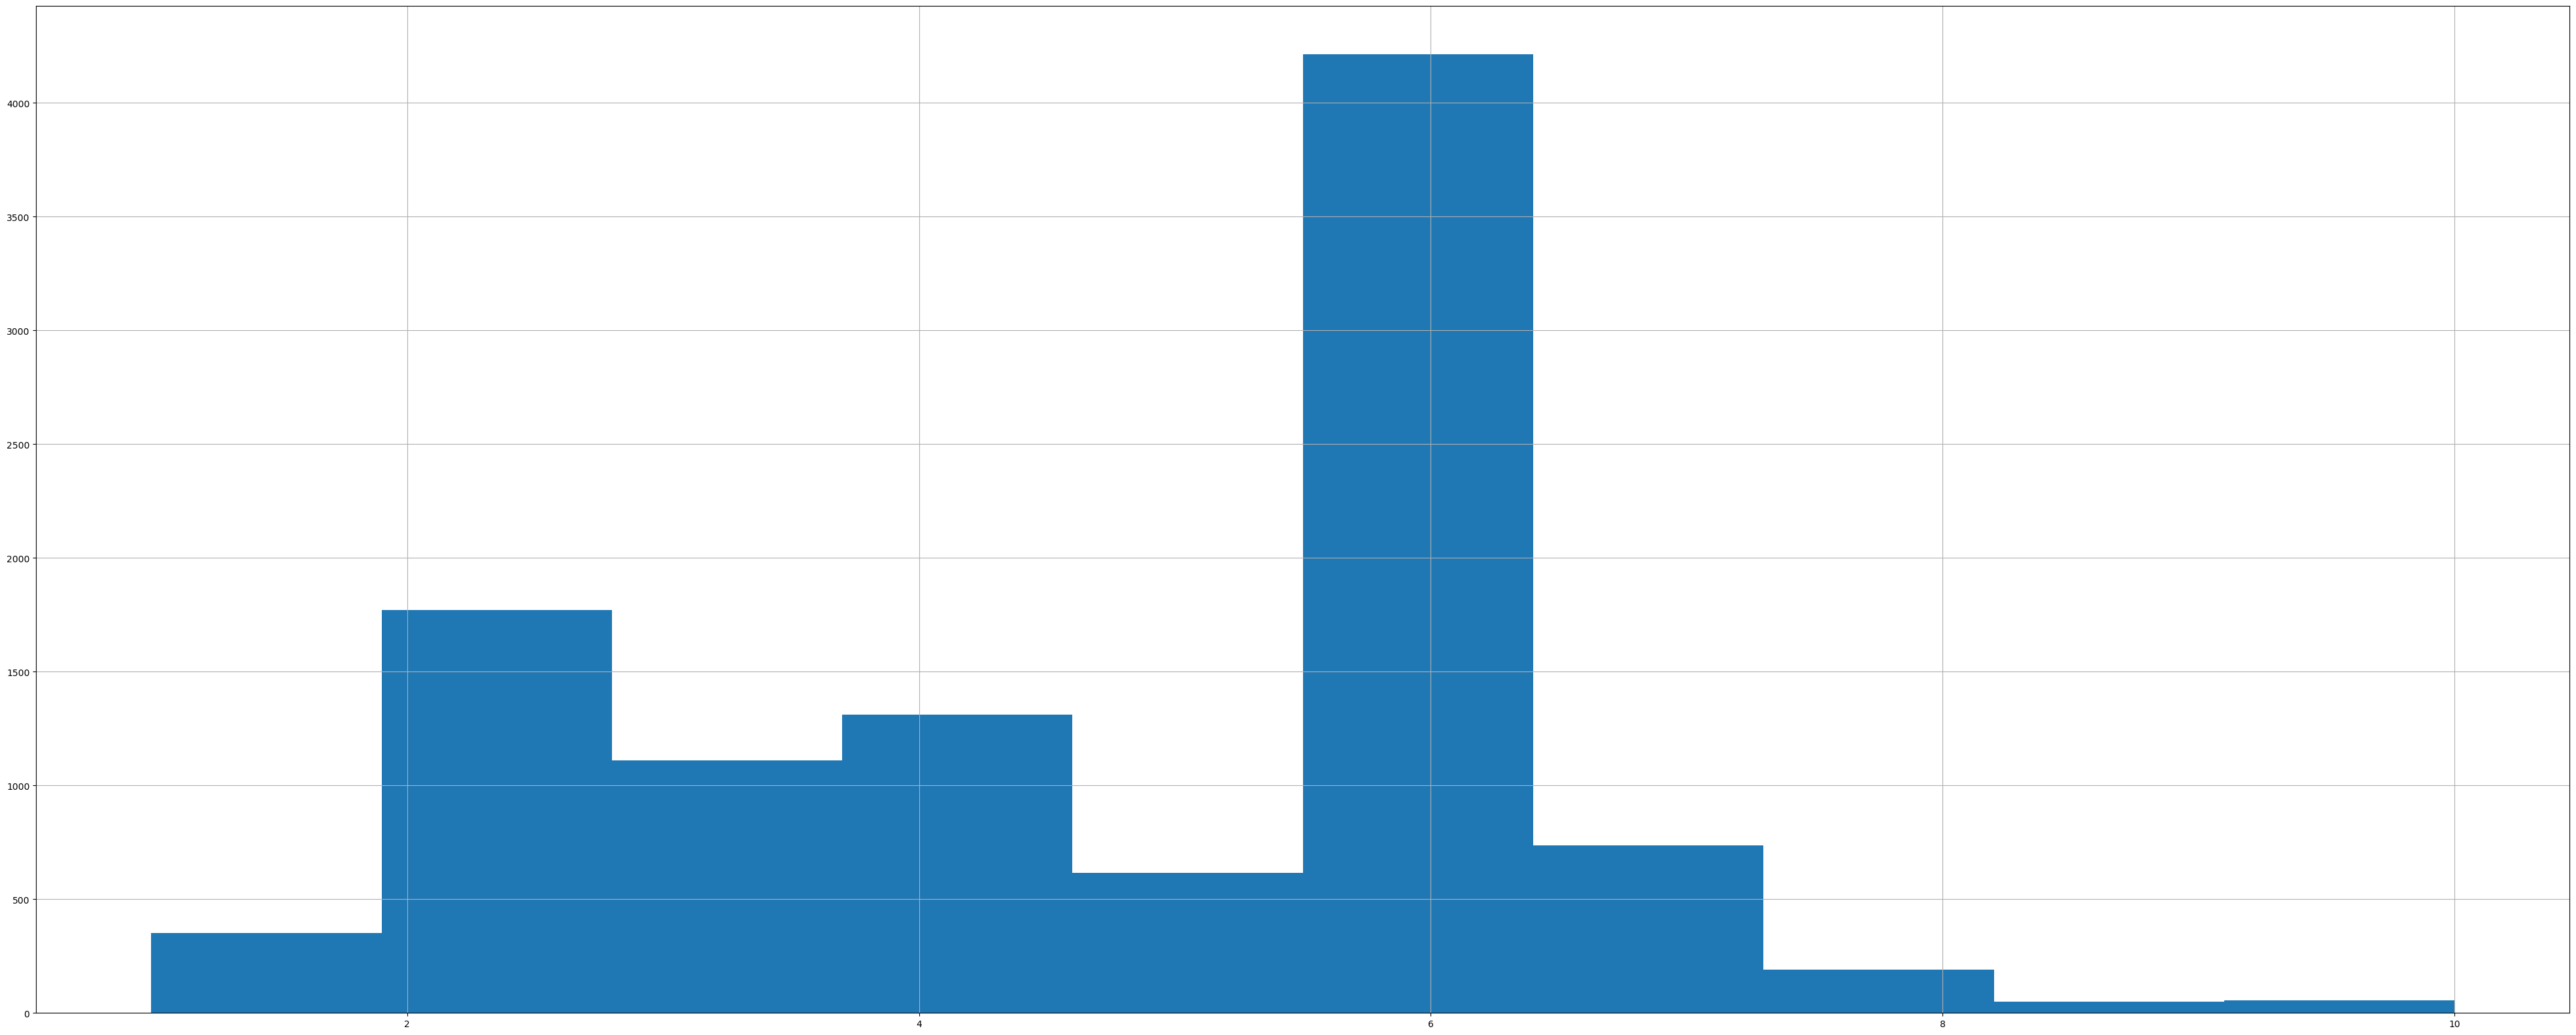

In [9]:
train_data.hardness.hist()

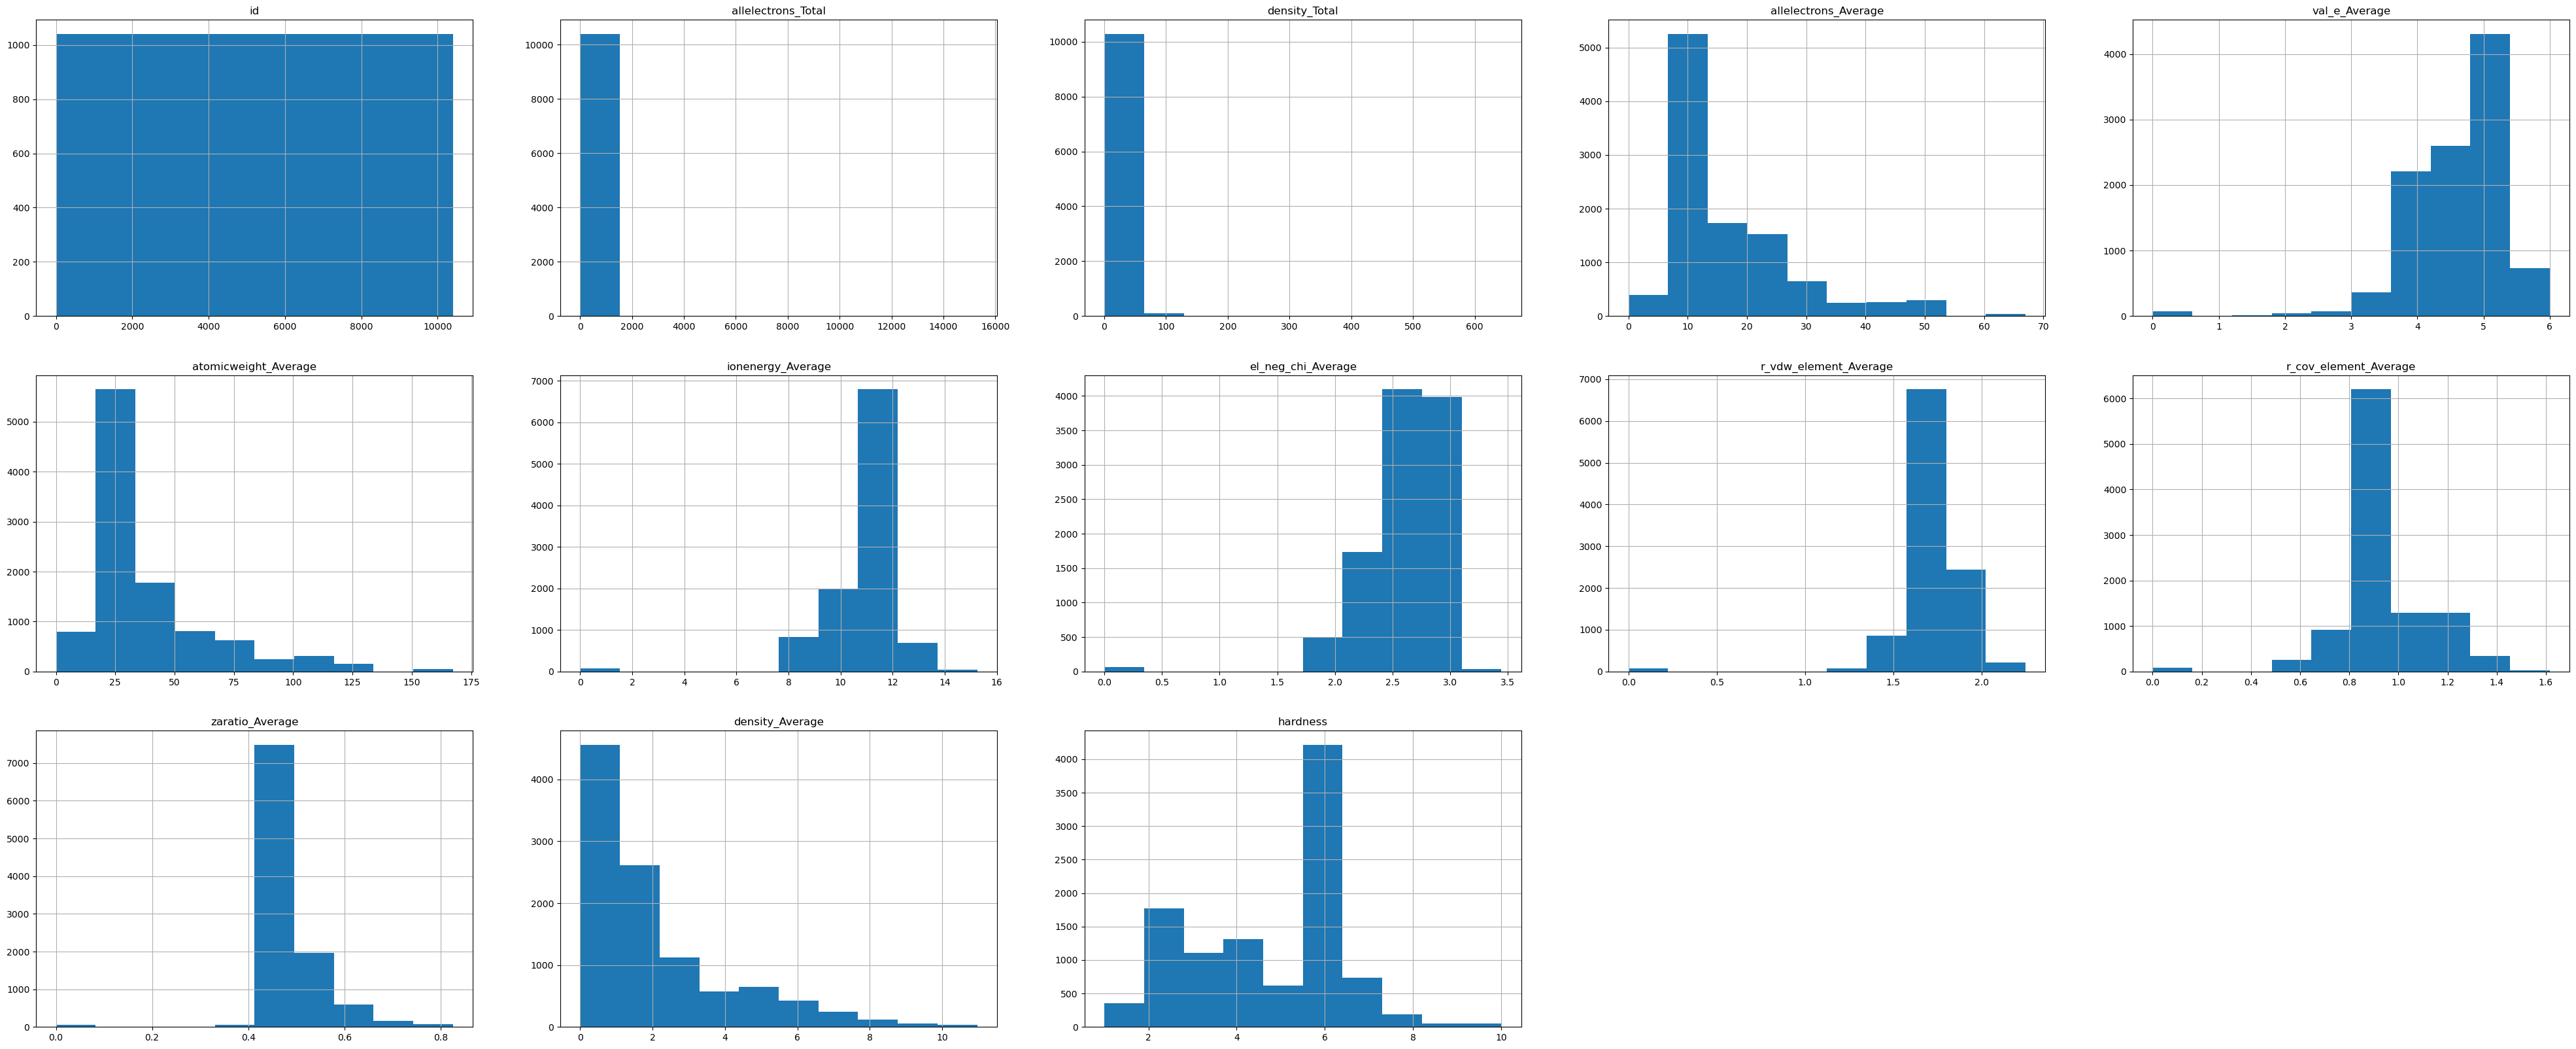

In [10]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in train_data.columns:
  plt.subplot(3,5,c)
  plt.title(f"{i}")
  train_data[i].hist()
  c+=1
plt.show()

<Axes: >

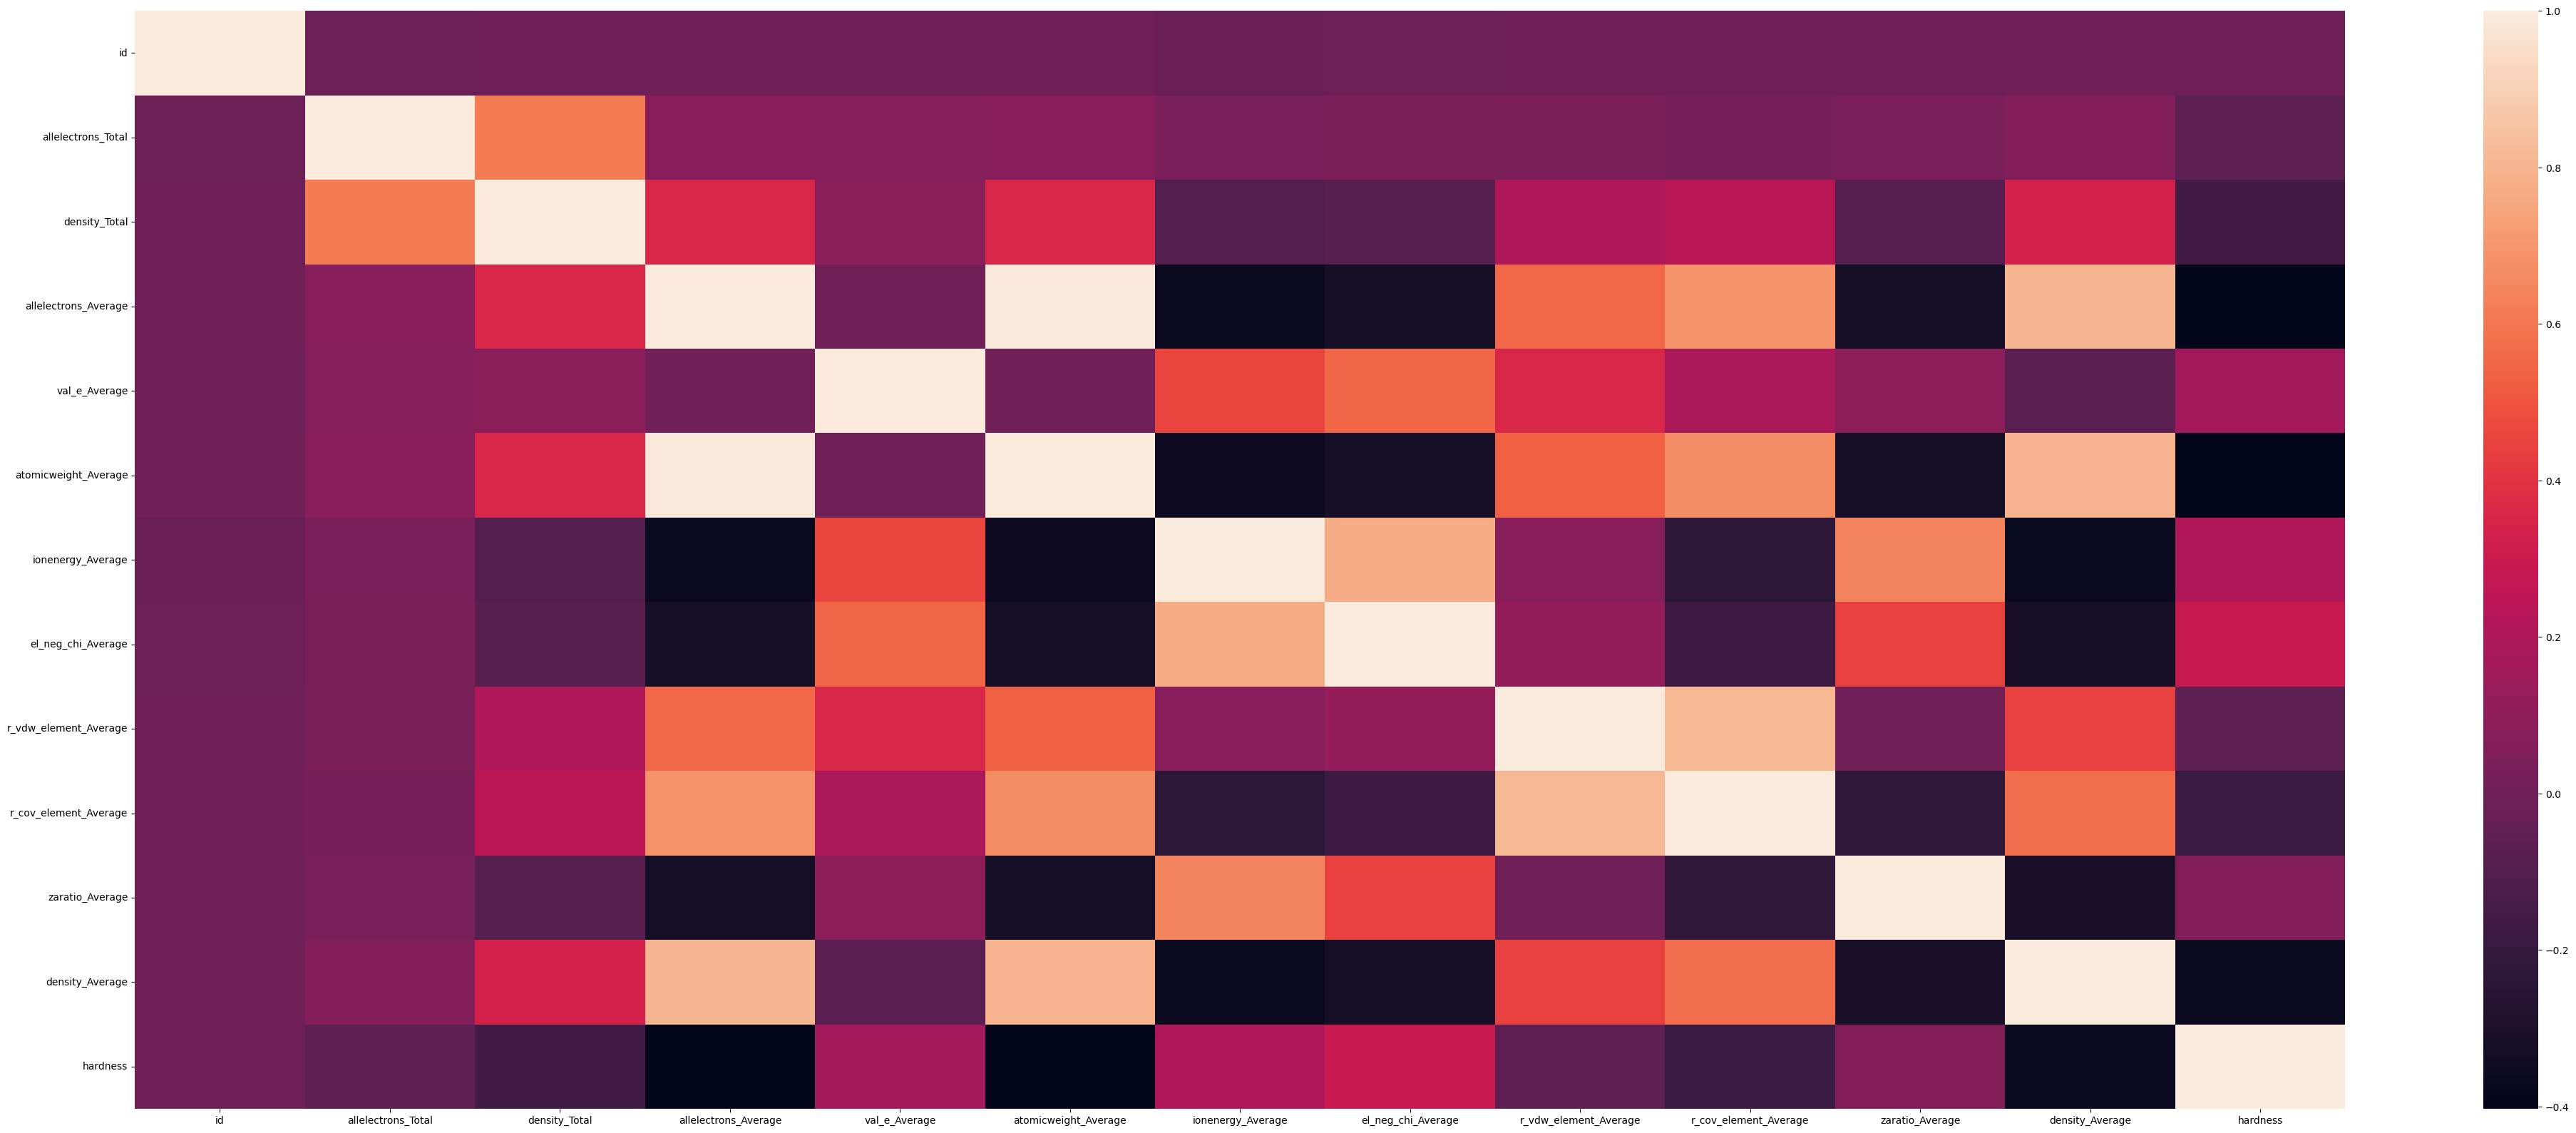

In [11]:
sns.heatmap(train_data.corr())

In [12]:
corr_matrix = train_data.corr()
printed=[]
for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if((corr_matrix[i][j]>=0.7 or corr_matrix[i][j]<=-0.7) and corr_matrix[i][j]!=1.0
          and (j,i) not in printed):
            print(i,j,corr_matrix[i][j])
#             plt.scatter(x=train_data[i], y=train_data[j])
            plt.show()
            printed.append((i,j))

allelectrons_Average atomicweight_Average 0.990660448379587
allelectrons_Average density_Average 0.8036410605742816
atomicweight_Average density_Average 0.7965642028701984
ionenergy_Average el_neg_chi_Average 0.7740499933422799
r_vdw_element_Average r_cov_element_Average 0.8118230136304508


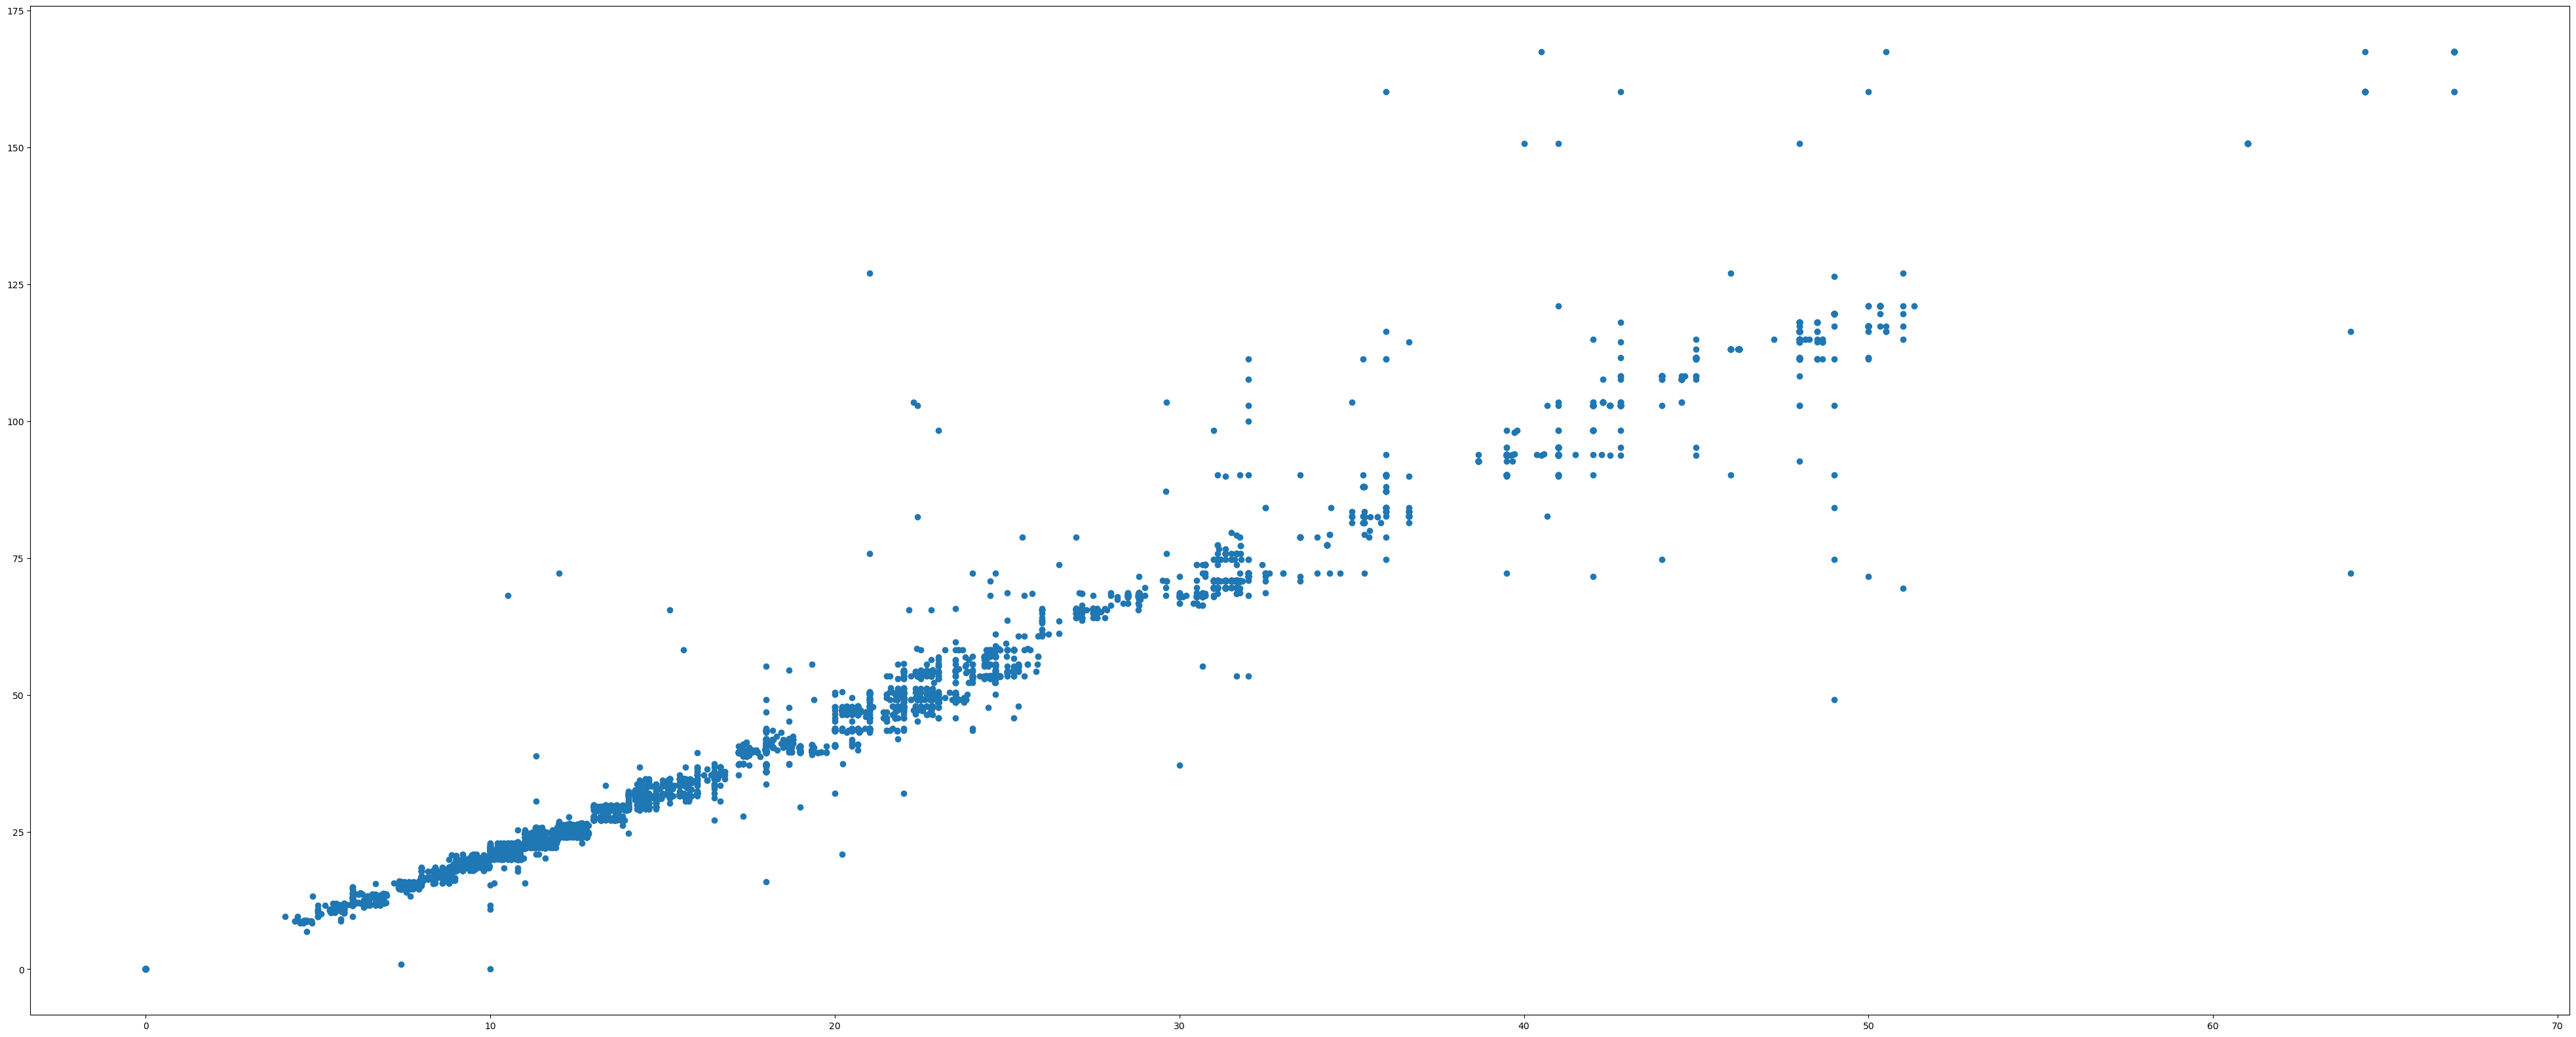

In [13]:
plt.scatter(x=train_data['allelectrons_Average'], y=train_data['atomicweight_Average'])

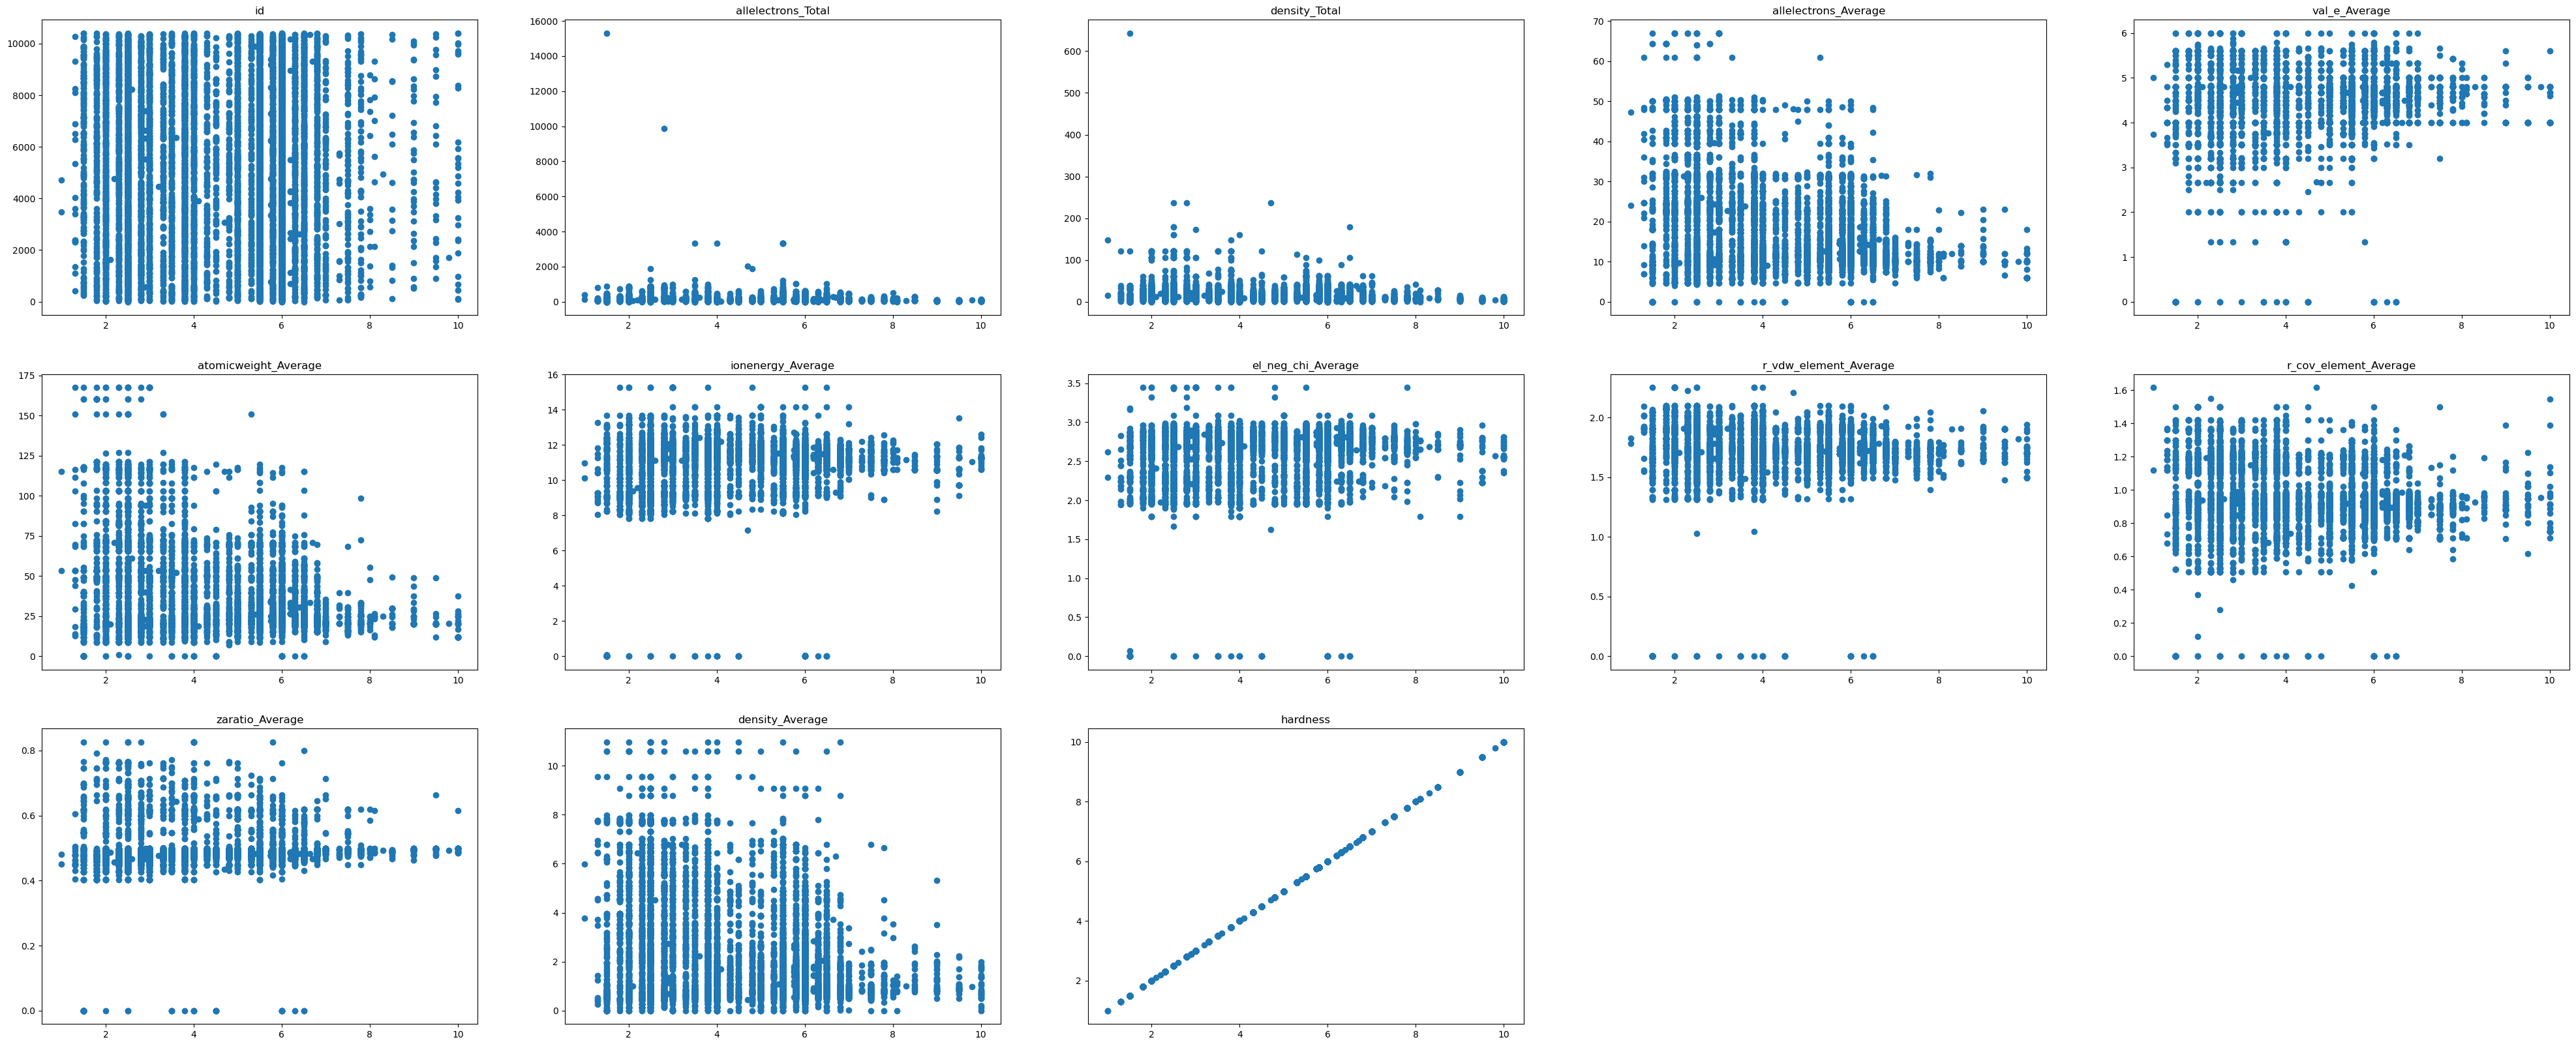

In [14]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in train_data.columns:
  plt.subplot(3,5,c)
  plt.title(f"{i}")
  plt.scatter(x=train_data['hardness'], y=train_data[i])
  c+=1
plt.show()

In [15]:
train_data.hardness.max()

10.0

### Modelling

In [16]:
X = train_data.drop(columns=['id','allelectrons_Average','hardness'])
y= train_data['hardness']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=112)

### Linear Regression - Baseline Model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
np.unique(np.sort(np.around(y_pred,1)))

array([ 1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,
        4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,
        5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
        7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  8. ,  8.6,  9. ,  9.4,  9.5,
        9.6,  9.7, 10. ])

In [19]:
print(np.median(abs(y_pred - y_test)))
print(r2_score(y_test, y_pred),mean_squared_error(y_pred,y_test),median_absolute_error(y_pred,y_test))

0.9947957451664258
0.23445669048374274 2.1926867697538324 0.9947957451664258


In [20]:
print(model.coef_)
print(model.intercept_)

[-2.47224405e-04 -3.51149959e-04  9.51712533e-02 -2.66354098e-02
 -8.68715475e-02  1.05261093e+00  1.77553658e+00 -4.09315961e-01
 -4.45937437e+00 -8.45466530e-02]
3.1602840813881206


A normal linear model only gives us 0.22 R2 with the test data. Which tells us that only 22% of our error are being explained by the model and the rest are still unexplained. We need to come up with a better model, more advanced feature extraction to get the best prediction. Why?
1. Firstly, we don't see any linear relationship between the predictors and the target to model a linear model.
2. Second, having more feature is not always good for the model, a combination of features might be more helpful.

What other models can we use?
1. KNN - K nearest neightbours works under the assumption that closest neighbours give away the answer, it does not depend on the linear dependency. So lets try that

### KNN - K Nearest Neighbor

In [21]:
model = KNeighborsRegressor(n_neighbors=10, weights='distance', algorithm='ball_tree')
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, weights='distance')

In [22]:
y_pred = model.predict(X_test)

In [23]:
print(np.median(abs(y_pred - y_test)))
print(r2_score(y_test, y_pred),mean_squared_error(y_pred,y_test),median_absolute_error(y_pred,y_test))

0.7690399425331516
0.35876871952714484 1.8366293945323546 0.7690399425331516


Since KNN works well with small number of neighbors why not use PCA to reduce dimensinlaity of data. This can be continued into future after analysing various other models.